# n26 assignment test

### Instructions

#### data description

You have been provided with two data files:

    
  **1. n26_funnel_steps.csv - Data extract of our on-boarding funnel, with one entry for
each time a user successfully passes through a given funnel step.**


  **2. n26_users.csv - Corresponding data on user level features such as market, age
etc.**

*Please be aware that the data has not fully cleaned so you should watch out for
inconsistencies and treat them appropriately.*

#### Tasks

Choose 2 KPI's which you think are the most important for measuring the success of our
funnel.
For each:


a. Provide a summary of N26's performance against this KPI across our different
user groups.


b. Given what you know about N26 and using your analysis in part (a), provide
some specific recommendations as to how we might improve this metric.


### Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from plotly import graph_objects as go 
import plotly.express as px
import numpy as np
import math
from scipy import stats as st
import plotly.io as pio

In [2]:
import warnings
warnings.simplefilter("ignore")

### Data uploading

In [3]:
n26_funnel_steps = pd.read_csv('n26_funnel_steps.csv')

In [4]:
n26_users = pd.read_csv('n26_users.csv')

### Data validation and cleaning

In [5]:
n26_funnel_steps.head()

,user_id,funnel_step,timestamp
0,b64caac4-c6a8-4b85-b504-2bbd3e28e175,sign_up_initiated,2019-01-05 23:00:00
1,77d7332a-3220-49e2-bd86-780a421926ac,sign_up_initiated,2019-01-27 02:00:00
2,24fcc884-8938-49f1-ae3b-3d33ed3a9c53,sign_up_initiated,2019-01-30 02:00:00
3,55b9ab0e-72b8-4751-8225-623014cb877f,sign_up_initiated,2019-01-28 14:00:00
4,11f32569-a4b1-4850-a90a-e535e6242168,sign_up_initiated,2019-01-02 04:00:00


In [6]:
n26_users.head()

,user_id,channel,market,platform,age
0,b64caac4-c6a8-4b85-b504-2bbd3e28e175,organic,FRA,ios,35
1,77d7332a-3220-49e2-bd86-780a421926ac,organic,FRA,ios,20
2,24fcc884-8938-49f1-ae3b-3d33ed3a9c53,paid_social,FRA,ios,25
3,55b9ab0e-72b8-4751-8225-623014cb877f,affiliate,FRA,ios,24
4,11f32569-a4b1-4850-a90a-e535e6242168,organic,FRA,ios,23


**n26_funnel_steps validation**

In [7]:
n26_funnel_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52412 entries, 0 to 52411
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      52412 non-null  object
 1   funnel_step  52412 non-null  object
 2   timestamp    52412 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


at this moment it is obvious that timestamp has wrong format, which is needed to be changed 

there are no any misses in dataframe, at least i can't see them now

In [8]:
n26_funnel_steps['timestamp'] = pd.to_datetime(n26_funnel_steps['timestamp'])

lets check duplicates

In [9]:
n26_funnel_steps.duplicated().sum()

0

There are no duplicated rows

**n26_users validation**

In [10]:
n26_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21229 entries, 0 to 21228
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   21229 non-null  object
 1   channel   21229 non-null  object
 2   market    21229 non-null  object
 3   platform  21229 non-null  object
 4   age       21229 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 829.4+ KB


In [11]:
n26_users.duplicated().sum()

0

Seems like everything is fine with **n26_users**

#### lets check some random errors in recording data

In [12]:
list_of_df = [n26_funnel_steps, n26_users]

In [13]:
counter = 0
for i in list_of_df:
    list_of_columns = i.columns.tolist()
    for j in list_of_columns:
        print(j)
        print(i[j].unique())
        print('--------------------------------------------------')
    print('')
    counter += 1
    if counter != 2:
        print('')
        print('next dataframe')
        print('')

user_id
['b64caac4-c6a8-4b85-b504-2bbd3e28e175'
 '77d7332a-3220-49e2-bd86-780a421926ac'
 '24fcc884-8938-49f1-ae3b-3d33ed3a9c53' ...
 'e0169fb0-8771-4add-b400-c72f83c44e07'
 '23c5a66e-0996-42ce-84c3-f659679703fd'
 '6c549723-fb04-45a4-86c3-df11d575d96c']
--------------------------------------------------
funnel_step
['sign_up_initiated' 'sign_up_completed' 'kyc_completed' 'first_deposit']
--------------------------------------------------
timestamp
['2019-01-05T23:00:00.000000000' '2019-01-27T02:00:00.000000000'
 '2019-01-30T02:00:00.000000000' ... '2019-03-09T11:00:00.000000000'
 '2019-03-15T02:00:00.000000000' '2019-03-06T04:00:00.000000000']
--------------------------------------------------


next dataframe

user_id
['b64caac4-c6a8-4b85-b504-2bbd3e28e175'
 '77d7332a-3220-49e2-bd86-780a421926ac'
 '24fcc884-8938-49f1-ae3b-3d33ed3a9c53' ...
 '782d139b-3f48-429b-87d9-84910e5f3baf'
 'c376d4dd-bcee-4ae3-9ca5-1bab74b911fc'
 '3b3c2430-2517-4a72-b84e-5166382fbc30']
---------------------------

Seems like all text columns don't have any critical errors causing duplication or misunderstanding

### Analysis

At first glance, funnel direction is pretty easy to understand 

sign_up_initiated - sign_up_completed - kyc_completed  - first_deposit 

In [14]:
df_funnel = n26_funnel_steps

In [15]:
df_funnel['num_of_step'] = n26_funnel_steps.sort_values(['timestamp','funnel_step'], ascending=[True,False]) \
             .groupby(['user_id']) \
             .cumcount() + 1

In [16]:
df_funnel

,user_id,funnel_step,timestamp,num_of_step
0,b64caac4-c6a8-4b85-b504-2bbd3e28e175,sign_up_initiated,2019-01-05 23:00:00,1
1,77d7332a-3220-49e2-bd86-780a421926ac,sign_up_initiated,2019-01-27 02:00:00,1
2,24fcc884-8938-49f1-ae3b-3d33ed3a9c53,sign_up_initiated,2019-01-30 02:00:00,1
3,55b9ab0e-72b8-4751-8225-623014cb877f,sign_up_initiated,2019-01-28 14:00:00,1
4,11f32569-a4b1-4850-a90a-e535e6242168,sign_up_initiated,2019-01-02 04:00:00,1
...,...,...,...,...
52407,51ea344a-6d4e-45fd-8ddd-4c245748272b,first_deposit,2019-02-13 11:00:00,4
52408,043cdc30-3664-4a1d-8698-ba62953e30ed,first_deposit,2019-02-04 16:00:00,4
52409,87ab9864-c8da-4264-9cc6-af70f9c1c550,first_deposit,2019-02-18 11:00:00,4
52410,4be6ddf2-ebd5-4cf8-9b30-115d9ebdf933,first_deposit,2019-01-26 18:00:00,4


lets take random user_id, just to check if the hypothesis with direction of funnel is correct

In [17]:
random_id = df_funnel['user_id'].sample().values[0]

In [18]:
random_id

'a977dca0-f1dc-460e-aac3-8305889aacd2'

In [19]:
df_funnel.query("user_id == @random_id")

,user_id,funnel_step,timestamp,num_of_step
17983,a977dca0-f1dc-460e-aac3-8305889aacd2,sign_up_initiated,2019-01-27 19:00:00,1
33781,a977dca0-f1dc-460e-aac3-8305889aacd2,sign_up_completed,2019-01-28 17:00:00,2


After doing this several times, guess of funnel direction is prooved

In [20]:
sum_of_actions = df_funnel['funnel_step'].value_counts()

Lets build a funnel graph

In [81]:

fig = go.Figure(
                
    go.Funnel(
        y=[
            'sign_up_initiated',
            'sign_up_completed',
            'kyc_completed',
            'first_deposit',
        ],
        x=[sum_of_actions[0], sum_of_actions[1], sum_of_actions[2], sum_of_actions[3]],
        
    )
)

fig.update_layout(template = 'seaborn',  title='N26 Funnel',  plot_bgcolor='#16B6B3', paper_bgcolor='#16B6B3',)
    
fig.show() 

What do we have according to this visual:

- the biggest decrease in amount of users going to the next step is happenng on a stage of *KYC*, if the other steps are keeping more then 70% of previous amount, *KYC* keeps only 61.6% 

- to the end stage (*First Deposit*) only 31.9% of initial amount comes

- step, which keeps the biggest amount of users is *First Deposit*, it keeps 73.1%

##### Now, lets add categorization to the analysis

In [22]:
df_funnel['user_id'].nunique()

21315

In [23]:
n26_users['user_id'].nunique()

21229

In [24]:
n26_users['user_id'].count()

21229

All users in table **n26_users** are unique, so we can use left merge of **df_funnel** with **n26_users** to add more data 

In [25]:
df_combined = pd.merge(df_funnel, n26_users, on='user_id', how='left')

In [26]:
len(df_combined)

52412

In [27]:
len(df_funnel)

52412

There are no dublication of data, so everything is fine in merge step

In [28]:
df_combined.head()

,user_id,funnel_step,timestamp,num_of_step,channel,market,platform,age
0,b64caac4-c6a8-4b85-b504-2bbd3e28e175,sign_up_initiated,2019-01-05 23:00:00,1,organic,FRA,ios,35.0
1,77d7332a-3220-49e2-bd86-780a421926ac,sign_up_initiated,2019-01-27 02:00:00,1,organic,FRA,ios,20.0
2,24fcc884-8938-49f1-ae3b-3d33ed3a9c53,sign_up_initiated,2019-01-30 02:00:00,1,paid_social,FRA,ios,25.0
3,55b9ab0e-72b8-4751-8225-623014cb877f,sign_up_initiated,2019-01-28 14:00:00,1,affiliate,FRA,ios,24.0
4,11f32569-a4b1-4850-a90a-e535e6242168,sign_up_initiated,2019-01-02 04:00:00,1,organic,FRA,ios,23.0


In [29]:
first_event_date = df_combined.groupby('user_id')['timestamp'].min()
first_event_date.name = 'first_step_time'
df_combined = df_combined.join(first_event_date,on='user_id')
df_combined['time_diff_total'] = (df_combined['timestamp'] - df_combined['first_step_time']).astype('timedelta64[D]')
df_combined['diff_from_last_step'] = df_combined.groupby('user_id')['timestamp'].diff() / np.timedelta64(1, 'h')
df_combined['diff_from_last_step'] = df_combined['diff_from_last_step'].fillna(0)
is_converted = df_combined.loc[df_combined['funnel_step'] == 'first_deposit']
is_converted['fully_completed'] = True
is_converted = is_converted[['user_id', 'fully_completed']]
df_combined = pd.merge(df_combined, is_converted, on='user_id', how='left')
df_combined['fully_completed'] = df_combined['fully_completed'].fillna(False)

Here i add time_diff column to understand, how many time is needed to pass to the next stage and info about achieving final stage

In [30]:
random_id = df_combined['user_id'].sample().values[0]
df_combined.query("user_id == @random_id")

,user_id,funnel_step,timestamp,num_of_step,channel,market,platform,age,first_step_time,time_diff_total,diff_from_last_step,fully_completed
6056,879fde80-f7a0-4cdd-9531-a860bcb540bf,sign_up_initiated,2019-01-30 11:00:00,1,organic,DEU,android,29.0,2019-01-30 11:00:00,0.0,0.0,False
25542,879fde80-f7a0-4cdd-9531-a860bcb540bf,sign_up_completed,2019-01-31 06:00:00,2,organic,DEU,android,29.0,2019-01-30 11:00:00,0.0,19.0,False


Random chosen ID works fine

In [31]:
df_combined.groupby(['funnel_step', 'platform']).agg({'user_id': 'nunique','age': 'mean', 'time_diff_total': "mean", 'diff_from_last_step': "mean", 'fully_completed': 'sum'})

user_id        age  time_diff_total  \
funnel_step       platform                                        
first_deposit     android      2574  30.879953        25.585082   
                  ios          4180  31.028708        25.329187   
kyc_completed     android      3526  30.830686        10.172717   
                  ios          5708  30.954975        10.081289   
sign_up_completed android      5722  30.948095         0.682803   
                  ios          9264  31.179080         0.685881   
sign_up_initiated android      8096  30.982831         0.000000   
                  ios         13088  31.101467         0.000000   

                            diff_from_last_step  fully_completed  
funnel_step       platform                                        
first_deposit     android            352.093240             2574  
                  ios                348.086603             4180  
kyc_completed     android            226.869541             2572  
                  ios                225.001927             4170  
sign_up_completed android             28.621811             2567  
                  ios                 28.583225             4171  
sign_up_initiated android              0.000000             2567  
                  ios                  0.000000             4169

here we can see, that there are a few records, which were understood as totally achieving the final stage not passing all the previous ones

In [32]:
df_check = df_combined.loc[df_combined['fully_completed'] == True]
df_check = df_check.groupby('user_id').agg({'num_of_step': 'count'}).reset_index()
df_check = df_check.loc[df_check['num_of_step'] != 4]
print(len(df_check))

46


There are 46 records, that are beyond our scope of natural flow of customer through all stages, i prefer to delete them from dataframe, as it is not very massive group, but lies outside 

In [33]:
list_of_strange_id = df_check['user_id'].to_list()

In [34]:
df_combined = df_combined[~df_combined['user_id'].isin(list_of_strange_id)]

In [35]:
platform = df_combined.groupby(['funnel_step', 'platform']).agg({'user_id': 'nunique','age': 'mean', 'time_diff_total': "mean", 'diff_from_last_step': "mean", 'fully_completed': 'sum'})

now everything is perfect

#### platform category

In [36]:
platform['convertion'] = platform['fully_completed'] / platform['user_id']

In [37]:
platform.sort_values(by = 'convertion', ascending=True)

user_id        age  time_diff_total  \
funnel_step       platform                                        
sign_up_initiated android      8087  30.988376         0.000000   
                  ios         13069  31.094804         0.000000   
sign_up_completed android      5713  30.958516         0.683529   
                  ios          9243  31.175376         0.687006   
kyc_completed     android      3512  30.851367        10.171412   
                  ios          5688  30.939522        10.078411   
first_deposit     android      2558  30.914386        25.582877   
                  ios          4150  31.003133        25.324819   

                            diff_from_last_step  fully_completed  convertion  
funnel_step       platform                                                    
sign_up_initiated android              0.000000             2558    0.316310  
                  ios                  0.000000             4150    0.317545  
sign_up_completed android             28.654997             2558    0.447751  
                  ios                 28.624256             4150    0.448988  
kyc_completed     android            226.712130             2558    0.728360  
                  ios                224.831751             4150    0.729606  
first_deposit     android            351.838546             2558    1.000000  
                  ios                347.403133             4150    1.000000

Values show approximately similar numbers of conversion to the final stage of **first_deposit** for both of kinds of devices: based od IOS and Android. 

- while the difference in samples of devices is significant, the diffrence in conversion for both of them is very close - around 31.6-31.8%

- like already was mentioned, the situations with two platforms are very similar, it also can be referred to overall trends of going through stages with keeping the same amount of users (in %, of course) 

- even the age and required time is very similar, at least at first glance

In [38]:
platform = platform.reset_index()

In [39]:
stages = ["sign_up_initiateds", "sign_up_completed", "kyc_completed", "first_deposit"]
fig = px.funnel(platform, x='user_id', y='funnel_step', color='platform', color_discrete_map={"android": "#16B6B3", 
                                    "ios": "#2E282A"},)
fig.show()

To understand the truth of difference between two groups - IOS and Android,- i am going to conduct mannwhitneyu test, but the sample would be limited only with those id, who achieved final stage

In [40]:
final_achieved = df_combined.loc[df_combined['funnel_step'] == 'first_deposit']

In [41]:
final_achieved['time_diff_total'] = final_achieved['time_diff_total'].astype(int)

In [42]:
final_achieved_ios =  final_achieved.query("platform == 'ios'")['time_diff_total']
final_achieved_android =  final_achieved.query("platform == 'android'")['time_diff_total']

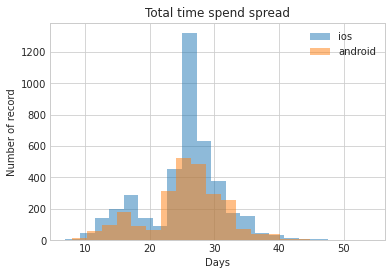

In [43]:
with plt.style.context('seaborn-whitegrid'):
    plt.hist(final_achieved_ios, bins=20, alpha=0.5, label='ios')
    plt.hist(final_achieved_android, bins=20, alpha=0.5, label='android')
    plt.legend(loc='upper right')
    plt.title('Total time spend spread')
    plt.xlabel('Days')
    plt.ylabel('Number of record')
plt.show()

Easy to see, that there is no option to keep normal spreading in both samples. Pictures are very similar, except one point - there are much more records for IOS in group of time spent for achieving final stage about 25-30 days.

lets check with mannwhitneyu test the difference between two samples, as it is only suitable method in our case

In [44]:
def mann_whitneyu_test(data1, data2):
    alpha = 0.05  # critical level of statistical significance

    results = st.mannwhitneyu(data1, data2)

    print('p-value: ', results.pvalue)

    if results.pvalue < alpha:
        print('We reject the null hypothesis: the difference is statistically significant')
    else:
        print(
            'Cannot reject null hypothesis, no difference can be made'
        ) 

In [45]:
mann_whitneyu_test(final_achieved_ios, final_achieved_android)

p-value:  0.04202090786762243
We reject the null hypothesis: the difference is statistically significant


So, as we can see, the difference between two platforms is really significant in required time for achieving last stage

just as a point of interest, lets check age data

In [46]:
final_achieved_ios =  final_achieved.query("platform == 'ios'")['age']
final_achieved_android =  final_achieved.query("platform == 'android'")['age']

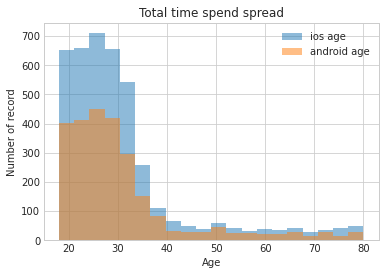

In [47]:
with plt.style.context('seaborn-whitegrid'):
    plt.hist(final_achieved_ios, bins=20, alpha=0.5, label='ios age')
    plt.hist(final_achieved_android, bins=20, alpha=0.5, label='android age')
    plt.legend(loc='upper right')
    plt.title('Total time spend spread')
    plt.xlabel('Age')
    plt.ylabel('Number of record')
plt.show()

In [48]:
mann_whitneyu_test(final_achieved_ios, final_achieved_android)

p-value:  0.3596222973468816
Cannot reject null hypothesis, no difference can be made


Age, regarding platform, cannot show any significant diffrence between two platforms

#### channel category

In [49]:
channel = df_combined.groupby(['funnel_step', 'channel']).agg({'user_id': 'nunique','age': 'mean', 'time_diff_total': "mean", 'diff_from_last_step': "mean", 'fully_completed': 'sum'})
channel['convertion'] = channel['fully_completed'] / channel['user_id']
channel.sort_values(by = 'convertion', ascending=True)

user_id        age  time_diff_total  \
funnel_step       channel                                            
sign_up_initiated affiliate       6042  30.683217         0.000000   
                  paid_social     4666  31.355122         0.000000   
                  paid_search     2150  30.844651         0.000000   
                  organic         8298  31.209207         0.000000   
sign_up_completed affiliate       4225  30.666272         0.703669   
                  paid_social     3276  31.499695         0.693834   
                  organic         5955  31.201008         0.671201   
                  paid_search     1500  30.973333         0.674667   
kyc_completed     paid_social     2021  31.430975        10.072736   
                  affiliate       2566  30.494544        10.096648   
                  paid_search      932  30.613734        10.122318   
                  organic         3681  30.978267        10.146428   
first_deposit     affiliate       1852  30.511339        25.361771   
                  organic         2715  30.918232        25.370902   
                  paid_search      684  30.795322        25.451754   
                  paid_social     1457  31.728209        25.585450   

                               diff_from_last_step  fully_completed  \
funnel_step       channel                                             
sign_up_initiated affiliate               0.000000             1852   
                  paid_social             0.000000             1457   
                  paid_search             0.000000              684   
                  organic                 0.000000             2715   
sign_up_completed affiliate              28.980592             1852   
                  paid_social            28.766484             1457   
                  organic                28.383039             2715   
                  paid_search            28.384667              684   
kyc_completed     paid_social           224.645225             1457   
                  affiliate             224.886984             1852   
                  paid_search           225.502146              684   
                  organic               226.519967             2715   
first_deposit     affiliate             348.190605             1852   
                  organic               347.358748             2715   
                  paid_search           351.799708              684   
                  paid_social           352.207962             1457   

                               convertion  
funnel_step       channel                  
sign_up_initiated affiliate      0.306521  
                  paid_social    0.312259  
                  paid_search    0.318140  
                  organic        0.327187  
sign_up_completed affiliate      0.438343  
                  paid_social    0.444750  
                  organic        0.455919  
                  paid_search    0.456000  
kyc_completed     paid_social    0.720930  
                  affiliate      0.721746  
                  paid_search    0.733906  
                  organic        0.737571  
first_deposit     affiliate      1.000000  
                  organic        1.000000  
                  paid_search    1.000000  
                  paid_social    1.000000

Here is pretty much the same:

- convertion % is very similar in each channel
- the most popular channel in absolut numbers - organic	, list - paid_search
- age and total spent time is also similar as it seems, lets check everything


In [50]:
channel = channel.reset_index()

In [51]:
stages = ["sign_up_initiateds", "sign_up_completed", "kyc_completed", "first_deposit"]
fig = px.funnel(channel, x='user_id', y='funnel_step', color='channel', color_discrete_map={"affiliate": "#16B6B3", 
                                    "organic": "#2E282A", "paid_search": "#042424", "paid_social": "#A09297"},)
fig.show()

In [52]:
final_achieved_affiliate =  final_achieved.query("channel == 'affiliate'")['time_diff_total']
final_achieved_paid_social =  final_achieved.query("channel == 'paid_social'")['time_diff_total']
final_achieved_paid_search =  final_achieved.query("channel == 'paid_search'")['time_diff_total']
final_achieved_organic =  final_achieved.query("channel == 'organic'")['time_diff_total']

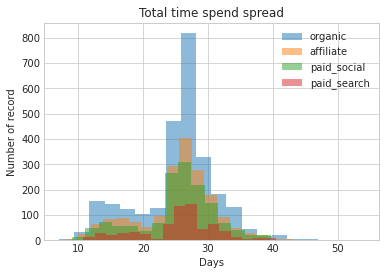

In [53]:
with plt.style.context('seaborn-whitegrid'):
    plt.hist(final_achieved_organic, bins=20, alpha=0.5, label='organic')
    plt.hist(final_achieved_affiliate, bins=20, alpha=0.5, label='affiliate')
    plt.hist(final_achieved_paid_social, bins=20, alpha=0.5, label='paid_social')
    plt.hist(final_achieved_paid_search, bins=20, alpha=0.5, label='paid_search')
    plt.legend(loc='upper right')
    plt.title('Total time spend spread')
    plt.xlabel('Days')
    plt.ylabel('Number of record')
plt.show()

very hard to say something specific, lets check with test

In [54]:
mann_whitneyu_test(final_achieved_organic, final_achieved_affiliate)

p-value:  0.41799089047047605
Cannot reject null hypothesis, no difference can be made


In [55]:
mann_whitneyu_test(final_achieved_organic, final_achieved_paid_social)

p-value:  0.18341725510501833
Cannot reject null hypothesis, no difference can be made


In [56]:
mann_whitneyu_test(final_achieved_organic, final_achieved_paid_search)

p-value:  0.3206717748953666
Cannot reject null hypothesis, no difference can be made


In [57]:
mann_whitneyu_test(final_achieved_organic, final_achieved_affiliate)

p-value:  0.41799089047047605
Cannot reject null hypothesis, no difference can be made


In [58]:
mann_whitneyu_test(final_achieved_affiliate, final_achieved_paid_social)

p-value:  0.2519919260694743
Cannot reject null hypothesis, no difference can be made


In [59]:
mann_whitneyu_test(final_achieved_affiliate, final_achieved_paid_search)

p-value:  0.3827765167972971
Cannot reject null hypothesis, no difference can be made


In [60]:
mann_whitneyu_test(final_achieved_paid_social, final_achieved_paid_search)

p-value:  0.4154144488904789
Cannot reject null hypothesis, no difference can be made


So, as we can see, channel type does't cause a significant change it total time for achieving final stage of N26 customer

In [61]:
final_achieved_affiliate =  final_achieved.query("channel == 'affiliate'")['age']
final_achieved_paid_social =  final_achieved.query("channel == 'paid_social'")['age']
final_achieved_paid_search =  final_achieved.query("channel == 'paid_search'")['age']
final_achieved_organic =  final_achieved.query("channel == 'organic'")['age']

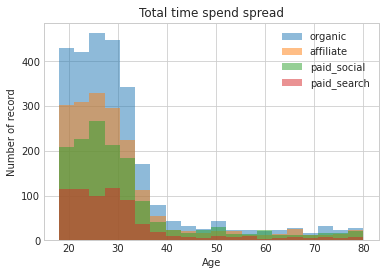

In [62]:
with plt.style.context('seaborn-whitegrid'):
    
    plt.hist(final_achieved_organic, bins=20, alpha=0.5, label='organic')
    plt.hist(final_achieved_affiliate, bins=20, alpha=0.5, label='affiliate')
    plt.hist(final_achieved_paid_social, bins=20, alpha=0.5, label='paid_social')
    plt.hist(final_achieved_paid_search, bins=20, alpha=0.5, label='paid_search')
    plt.legend(loc='upper right')
    plt.title('Total time spend spread')
    plt.xlabel('Age')
    plt.ylabel('Number of record')
plt.show()

lets just check with two datasets to prove the idea, that age doesn't affect in channel data too 

In [63]:
mann_whitneyu_test(final_achieved_organic, final_achieved_affiliate)

p-value:  0.07225744920018691
Cannot reject null hypothesis, no difference can be made


Further research i see as irrelevant. 

#### country category

In [64]:
market = df_combined.groupby(['funnel_step', 'market']).agg({'user_id': 'nunique','age': 'mean', 'time_diff_total': "mean", 'diff_from_last_step': "mean", 'fully_completed': 'sum'})
market['convertion'] = market['fully_completed'] / market['user_id']
market

user_id        age  time_diff_total  \
funnel_step       market                                        
first_deposit     AUT         983  30.833164        31.155646   
                  DEU        3767  30.989116        26.712769   
                  ESP         375  30.682667        17.181333   
                  FRA        1329  31.155756        17.714071   
                  GBR         254  30.649606        36.618110   
kyc_completed     AUT        1075  30.760930        12.306977   
                  DEU        4173  30.827462        12.305056   
                  ESP         937  30.996798         6.551761   
                  FRA        2703  31.098409         7.192009   
                  GBR         312  30.512821         9.262821   
sign_up_completed AUT        2062  31.174103         0.693986   
                  DEU        6965  31.048816         0.683417   
                  ESP        1610  31.351553         0.689441   
                  FRA        3527  31.032889         0.682733   
                  GBR         792  31.003788         0.689394   
sign_up_initiated AUT        3013  31.030534         0.000000   
                  DEU       10125  31.067160         0.000000   
                  ESP        2033  31.292671         0.000000   
                  FRA        4969  30.908030         0.000000   
                  GBR        1016  31.231299         0.000000   

                          diff_from_last_step  fully_completed  convertion  
funnel_step       market                                                    
first_deposit     AUT              452.016277              983    1.000000  
                  DEU              345.371383             3767    1.000000  
                  ESP              251.992000              375    1.000000  
                  FRA              251.726862             1329    1.000000  
                  GBR              658.811024              254    1.000000  
kyc_completed     AUT              277.795349              983    0.914419  
                  DEU              278.071891             3767    0.902708  
                  ESP              139.829242              375    0.400213  
                  FRA              155.791343             1329    0.491676  
                  GBR              204.833333              254    0.814103  
sign_up_completed AUT               28.877789              983    0.476722  
                  DEU               28.637330             3767    0.540847  
                  ESP               28.534783              375    0.232919  
                  FRA               28.538418             1329    0.376807  
                  GBR               28.635101              254    0.320707  
sign_up_initiated AUT                0.000000              983    0.326253  
                  DEU                0.000000             3767    0.372049  
                  ESP                0.000000              375    0.184456  
                  FRA                0.000000             1329    0.267458  
                  GBR                0.000000              254    0.250000

- first of all, the biggest market is Germany with over 10000 users on first stage, in this country conversion to the last stage is also the best - 37%
- the smallest market is Great Brittain, with only 1016 initial users and 25% of converted to the last stage
- the poorest in convertion is a market of Spain, with only 18.4% converted users
- here total required time is very different: less time needed in France and Spain (about 17-18 days) to convert to final stage, more then anywhere else in GB - 37 days 

In [65]:
market = market.reset_index()

In [66]:
stages = ["sign_up_initiateds", "sign_up_completed", "kyc_completed", "first_deposit"]
fig = px.funnel(market, x='user_id', y='funnel_step', color='market', color_discrete_map={"AUT": "#16B6B3", 
                                    "DEU": "#2E282A", "ESP": "#94D1BE", "FRA": "#A09297",  "GBR": "#9DB5B2"},)
fig.update_layout(template='ggplot2')
fig.show()

Lets go deeper

In [67]:
final_achieved_DEU =  final_achieved.query("market == 'DEU'")['time_diff_total']
final_achieved_FRA =  final_achieved.query("market == 'FRA'")['time_diff_total']
final_achieved_AUT =  final_achieved.query("market == 'AUT'")['time_diff_total']
final_achieved_ESP =  final_achieved.query("market == 'ESP'")['time_diff_total']
final_achieved_GBR =  final_achieved.query("market == 'GBR'")['time_diff_total']

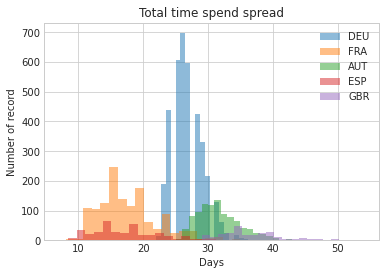

In [68]:
with plt.style.context('seaborn-whitegrid'):
    plt.hist(final_achieved_DEU, bins=20, alpha=0.5, label='DEU')
    plt.hist(final_achieved_FRA, bins=20, alpha=0.5, label='FRA')
    plt.hist(final_achieved_AUT, bins=20, alpha=0.5, label='AUT')
    plt.hist(final_achieved_ESP, bins=20, alpha=0.5, label='ESP')
    plt.hist(final_achieved_GBR, bins=20, alpha=0.5, label='GBR')
    plt.legend(loc='upper right')
    plt.title('Total time spend spread')
    plt.xlabel('Days')
    plt.ylabel('Number of record')
plt.show()

In [69]:
final_achieved_DEU.name = 'DEU'
final_achieved_FRA.name = 'FRA'
final_achieved_AUT.name = 'AUT'
final_achieved_ESP.name = 'ESP'
final_achieved_GBR.name = 'GBR'

In [70]:
list_of_markets = [final_achieved_DEU, final_achieved_FRA, final_achieved_AUT, final_achieved_ESP, final_achieved_GBR]

In [71]:
for i in list_of_markets:
    for j in list_of_markets:
        if i.name != j.name:
            print('comparing: ', i.name, 'and ', j.name)
            mann_whitneyu_test(i, j)
            print()
            print('-----------')
            print()
        else:
            pass

comparing:  DEU and  FRA
p-value:  0.0
We reject the null hypothesis: the difference is statistically significant

-----------

comparing:  DEU and  AUT
p-value:  6.202061044608665e-286
We reject the null hypothesis: the difference is statistically significant

-----------

comparing:  DEU and  ESP
p-value:  3.031701712512057e-179
We reject the null hypothesis: the difference is statistically significant

-----------

comparing:  DEU and  GBR
p-value:  2.4816062242354975e-150
We reject the null hypothesis: the difference is statistically significant

-----------

comparing:  FRA and  DEU
p-value:  0.0
We reject the null hypothesis: the difference is statistically significant

-----------

comparing:  FRA and  AUT
p-value:  0.0
We reject the null hypothesis: the difference is statistically significant

-----------

comparing:  FRA and  ESP
p-value:  0.011193727636373897
We reject the null hypothesis: the difference is statistically significant

-----------

comparing:  FRA and  GBR
p-va

The total amount of time needed to achieve final stage of making first deposit is really different in any country

age data across countries is very interesting too

In [72]:
final_achieved_DEU =  final_achieved.query("market == 'DEU'")['age']
final_achieved_FRA =  final_achieved.query("market == 'FRA'")['age']
final_achieved_AUT =  final_achieved.query("market == 'AUT'")['age']
final_achieved_ESP =  final_achieved.query("market == 'ESP'")['age']
final_achieved_GBR =  final_achieved.query("market == 'GBR'")['age']

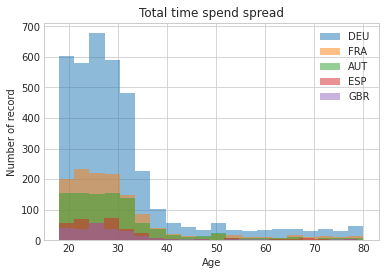

In [73]:
with plt.style.context('seaborn-whitegrid'):
    plt.hist(final_achieved_DEU, bins=20, alpha=0.5, label='DEU')
    plt.hist(final_achieved_FRA, bins=20, alpha=0.5, label='FRA')
    plt.hist(final_achieved_AUT, bins=20, alpha=0.5, label='AUT')
    plt.hist(final_achieved_ESP, bins=20, alpha=0.5, label='ESP')
    plt.hist(final_achieved_GBR, bins=20, alpha=0.5, label='GBR')
    plt.legend(loc='upper right')
    plt.title('Total time spend spread')
    plt.xlabel('Age')
    plt.ylabel('Number of record')
plt.show()

Still the same pictire, majority of users are in age from 20 to 35 years

In [74]:
final_achieved_DEU.name = 'DEU'
final_achieved_FRA.name = 'FRA'
final_achieved_AUT.name = 'AUT'
final_achieved_ESP.name = 'ESP'
final_achieved_GBR.name = 'GBR'
list_of_markets = [final_achieved_DEU, final_achieved_FRA, final_achieved_AUT, final_achieved_ESP, final_achieved_GBR]

In [75]:
for i in list_of_markets:
    for j in list_of_markets:
        if i.name != j.name:
            print('comparing: ', i.name, 'and ', j.name)
            mann_whitneyu_test(i, j)
            print()
            print('-----------')
            print()
        else:
            pass

comparing:  DEU and  FRA
p-value:  0.41331190070216095
Cannot reject null hypothesis, no difference can be made

-----------

comparing:  DEU and  AUT
p-value:  0.25780235274500485
Cannot reject null hypothesis, no difference can be made

-----------

comparing:  DEU and  ESP
p-value:  0.2388798904031859
Cannot reject null hypothesis, no difference can be made

-----------

comparing:  DEU and  GBR
p-value:  0.4222572477225344
Cannot reject null hypothesis, no difference can be made

-----------

comparing:  FRA and  DEU
p-value:  0.41331190070216095
Cannot reject null hypothesis, no difference can be made

-----------

comparing:  FRA and  AUT
p-value:  0.35996465842735176
Cannot reject null hypothesis, no difference can be made

-----------

comparing:  FRA and  ESP
p-value:  0.21654073687520758
Cannot reject null hypothesis, no difference can be made

-----------

comparing:  FRA and  GBR
p-value:  0.38174118340138863
Cannot reject null hypothesis, no difference can be made

-------

Statistically significant differance cannot be observed, while talking about age

## Conclusion

If we talk about general data: 
    
   - the biggest decrease in amount of users going to the next step is happenng on a stage of *KYC*, if the other steps are keeping more then 70% of previous amount, *KYC* keeps only 61.6% 

   - to the end stage (*First Deposit*) only 31.9% of initial amount comes

   - step, which keeps the biggest amount of users is *First Deposit*, it keeps 73.1%

There were 46 ID, whos path to the final stage does't include all 4 steps. They were deleted

If we talk about platform categories: 
- Values show approximately similar numbers of conversion to the final stage of **first_deposit** for both of kinds of devices: based od IOS and Android. 

- while the difference in samples of devices is significant, the diffrence in conversion for both of them is very close - around 31.6-31.8%

- like already was mentioned, the situations with two platforms are very similar, it also can be referred to overall trends of going through stages with keeping the same amount of users (in %, of course) 

- even the age and required time is very similar, at least at first glance
- there are much more records for IOS in group of time spent for achieving final stage about 25-30 days
- the difference between two platforms is really significant statistically in required time for achieving last stage

As for the channel:
- convertion % is very similar in each channel
- the most popular channel in absolut numbers - organic , list - paid_search
- age and total spent time is also similar as it seems
- channel type does't cause a significant change it total time for achieving final stage of N26 customer

As for the country: 
- first of all, the biggest market is Germany with over 10000 users on first stage, in this country conversion to the last stage is also the best - 37%
- the smallest market is Great Brittain, with only 1016 initial users and 25% of converted to the last stage
- the poorest in convertion is a market of Spain, with only 18.4% converted users
- here total required time is very different: less time needed in France and Spain (about 17-18 days) to convert to final stage, more then anywhere else in GB - 37 days
- The total amount of time needed to achieve final stage of making first deposit is really *statistically different* in any country

Age doen't vary very much in any categories

but we can still see, that the majority of users are in age from 20 to 35

## Advices for future improvement

Ios/Android non-equality is not a very big problem, as Iphone is really very popular phone and very used by the targer audience of N26 - 20-35 years olders.

What is really needed to be improoved, it is time passing from first initiated signing in to first deposit, especially in GB, maybe there are some obstackles in delivering cards?

The poorest convertion rate is in Spain. Why? this should be discovered by sociological team, because all-the-way takes less time then in other countries, this is illogical.

Maybe success of Germany should be tryed to be translated in realities of other countries?

Online bank is easy to understand for younger generation, how it is possible to invite more elderly people to spread the cover of population?

# Task 2:

A Product Manager (PM) has approached you for advice on running an A/B test in the
sign-up step of the funnel (between sign_up_initiated and sign_up_completed ). They want
to test swapping the order of the first two steps in the sign-up form, but they don't have much
experience in running tests. Write-up a short experimental design which the PM can use as
the basis for the experiment. This should include your recommendations on:
1. the experimental setup and success criteria
2. the required sample size & how long the experiment should be run for
3. how to measure and interpret the results
4. any other considerations the PM should keep in mind

The first step is to crate a hypothesis: 

$$ H0:  p = p0 $$
$$ Ha:  p \neq po $$

where we predict some changes effect on our experiment group. It can be range of any numbers, from 2 to 100% and more. But being more realistic, lets stay on *3%*, from 71% of convertion to next stage to 74% 

then we need to understand required samples sizes:   
  there is a specific formula for that, but lets be honest, not a lot of people wants to go very deep in it, lets just put it inside code to do everything instead of us. 

But before that, lets also notice, that there pretty stable values, that we also use in this calculation: 
1. confidence level $$ a = 0.05 $$
2. power of test, which is normally set on level 0.8 $$ 1 - β $$

In [76]:
import statsmodels.stats.api as sms

In [77]:
effect_size = sms.proportion_effectsize(0.71, 0.74)

required_n = sms.NormalIndPower().solve_power(
    effect_size,
    power = 0.8,
    alpha = 0.05,
    ratio = 1)
required_n = round(required_n)
print(required_n)

3475


3475 is perfect size for each group in A/B test.

then, after splitting our respondents into two groups: control and experiment, we should compare two groups results by testing our hypothesis, whether the difference is statiscally different or it is not. 

Normally Z-Test is used for such kind of tasks, i wont go deep into explanation of it, just to know, that our task can be done via Python.  

If the result of test (**p-value**) is above our level of confidence, then we cannot reject null hypothesis, which means that new design doesn't affect covertion rate, and the same works in opposite direction

 if  $$p-value  > a$$ H0 is not rejected 

There are two simple rules for conducting a split test:

1. Don't stop the test until you reach the minimum sample size that will make the results statistically significant.
2. Do not stop the test until at least one complete business cycle has passed. For example, if the average time from the first entry to the first deposit in the application is three weeks, then allocate three weeks for the test.